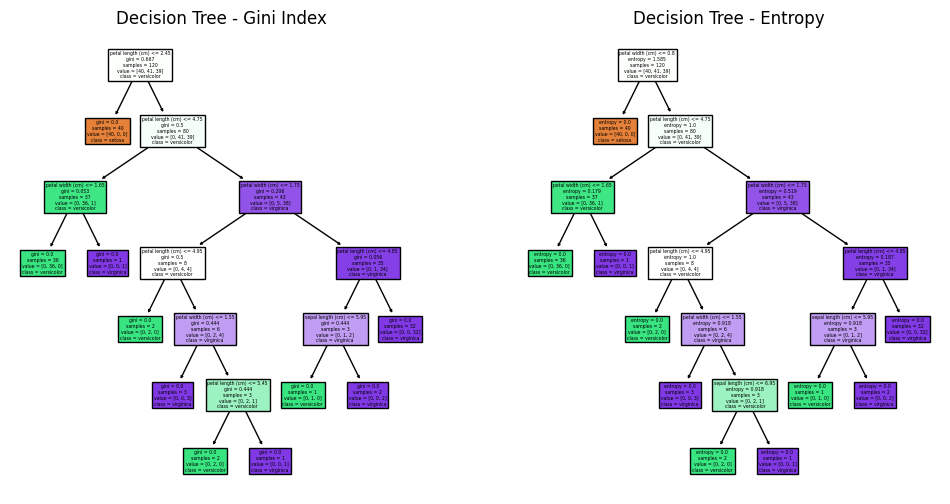

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train DecisionTree Classifier using Gini Index
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)

# Create and train DecisionTree Classifier using Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)

# Visualize the resulting decision trees
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tree(clf_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree - Gini Index")

plt.subplot(1, 2, 2)
plot_tree(clf_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree - Entropy")

plt.show()


# Create a decision tree without using sklearn library, just using the concept of entropy and choose what node will be the root, and subsequent decision parameters based on information gain. Show all calculations.

In [2]:
import numpy as np

def calculate_entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy

def calculate_information_gain(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask

    left_entropy = calculate_entropy(y[left_mask])
    right_entropy = calculate_entropy(y[right_mask])

    total_entropy = calculate_entropy(y)
    information_gain = total_entropy - (left_entropy * sum(left_mask) / len(y) + right_entropy * sum(right_mask) / len(y))
    return information_gain

def find_best_split(X, y):
    num_features = X.shape[1]
    best_feature = None
    best_threshold = None
    best_information_gain = -1

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            information_gain = calculate_information_gain(X, y, feature_index, threshold)
            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

def print_tree(node, depth=0):
    indent = "  " * depth
    print(f"{indent}Predicted Class: {node.predicted_class}")
    if node.left is not None:
        print(f"{indent}Feature Index: {node.feature_index}, Threshold: {node.threshold}")
        print_tree(node.left, depth + 1)
    if node.right is not None:
        print_tree(node.right, depth + 1)

def build_tree(X, y, depth=0, max_depth=None):
    unique_classes, counts = np.unique(y, return_counts=True)
    predicted_class = unique_classes[np.argmax(counts)]
    node = Node(predicted_class)

    if depth == max_depth or len(np.unique(y)) == 1:
        return node

    best_feature, best_threshold = find_best_split(X, y)

    if best_feature is not None:
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        node.feature_index = best_feature
        node.threshold = best_threshold
        node.left = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth)
        node.right = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)

    return node

def predict_tree(node, sample):
    if node.left is None and node.right is None:
        return node.predicted_class

    if sample[node.feature_index] <= node.threshold:
        return predict_tree(node.left, sample)
    else:
        return predict_tree(node.right, sample)

# Example usage:
# Assume X and y are your features and labels
X_example = np.array([[2, 3], [1, 5], [3, 4], [5, 2]])
y_example = np.array([0, 0, 1, 1])

# Build the tree
tree_example = build_tree(X_example, y_example, max_depth=2)

# Print the resulting decision tree
print("Decision Tree - Part 2:")
print_tree(tree_example)

Decision Tree - Part 2:
Predicted Class: 0
Feature Index: 0, Threshold: 2
  Predicted Class: 0
  Predicted Class: 1


#  Show how decision trees can be used for both classification and regression using a program with sample dataset. Also visualize the decision tree obtained

Decision Tree for Classification:
 |--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |---

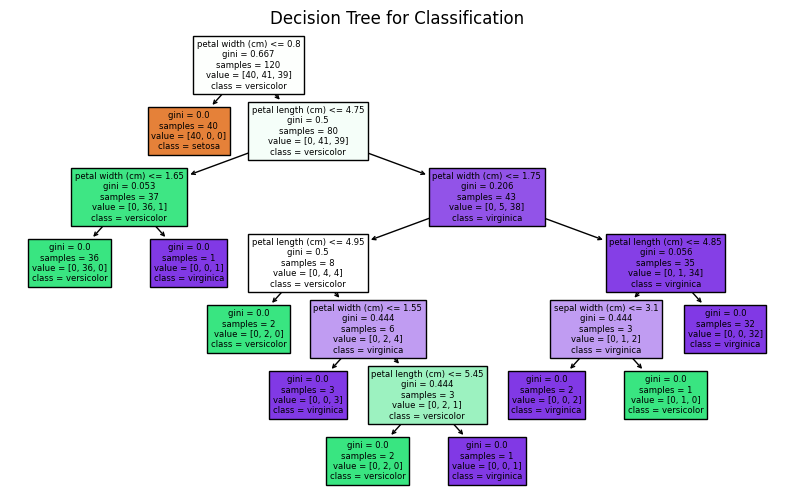

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

# Classification Example
iris = load_iris()
X_clf, y_clf = iris.data, iris.target
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Create and fit Decision Tree Classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_clf, y_train_clf)

# Visualize the Decision Tree for Classification (Text)
text_representation = export_text(clf_tree, feature_names=iris.feature_names)
print("Decision Tree for Classification:\n", text_representation)

# Visualize Decision Tree Structure (Graphical)
plt.figure(figsize=(10, 6))
plot_tree(clf_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Classification")
plt.show()


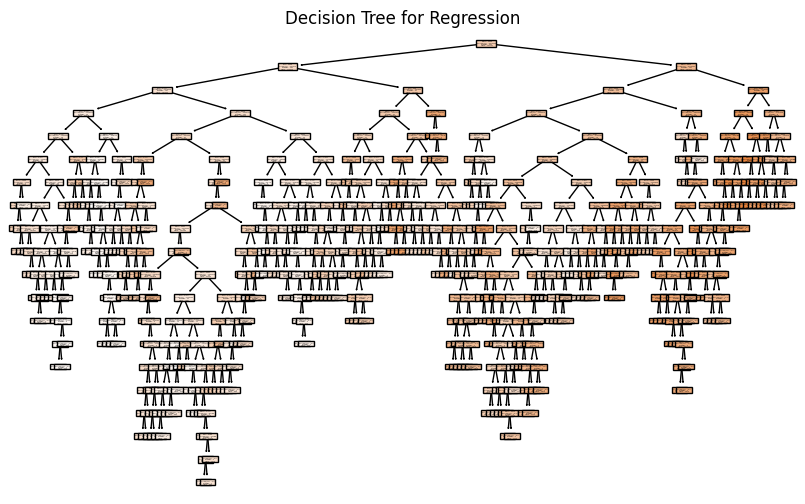

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split

# Regression Example
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create and fit Decision Tree Regressor
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_reg, y_train_reg)

# Visualize Decision Tree Structure (Graphical)
plt.figure(figsize=(10, 6))
plot_tree(reg_tree, filled=True, feature_names=diabetes.feature_names)
plt.title("Decision Tree for Regression")
plt.show()
